# Inference and Machine Learning : Berlemont Kevin

## Statistical inference and MSE

We consider a system with a half-length decay :
$$ P_{\lambda} (x) =  \frac{e^{-x / \lambda}}{Z(\lambda)} \quad \text{if $ 1<x<20$}$$
$$ P_{\lambda} (x) = 0$$

For normalization, the constant $Z(\lambda)$ will be :
$$ Z(\lambda) = (\lambda e^{-1/\lambda} - e^{-20/\lambda} \lambda)^{-1} $$

If we want to observe a set of events $\{ x_1,\cdots, x_n \}$, because all particles are independent we have the relation :
$$ \{ x\} = \otimes_i \{ x_i \}$$
This leads easily to :
$$ P_{\lambda} (x) = \Pi_i P_{\lambda} (x_i)$$

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

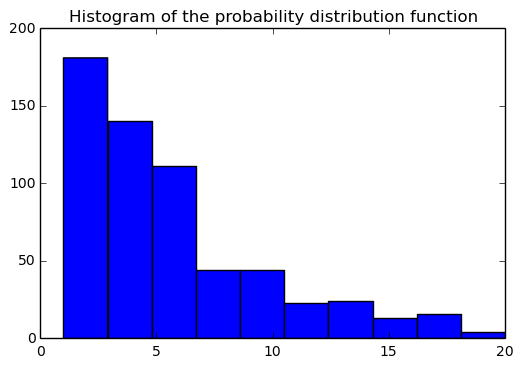

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
% matplotlib inline


def trunc_exp_decay(low, high, scale, size): # inverse transfor msampling
    rnd_cdf = np.random.uniform(ss.expon.cdf(x=low, scale=scale),
                                ss.expon.cdf(x=high, scale=scale),
                                size=size)
    return ss.expon.ppf(q=rnd_cdf, scale=scale)

Lambda =5
Size = 600
plt.hist(trunc_exp_decay(1, 20, Lambda, Size))
plt.xlim(0, 20)
plt.title('Histogram of the probability distribution function')

In [4]:
def observations(Lambda,n) :
    """Return n observations of the process"""
    sample = trunc_exp_decay(1, 20, Lambda, n)
    return sample

We now want to estimate the value of $\lambda$. First of all we use the maximum likehood estimator and we will optimize the value with the module scipy.

In [5]:
import scipy
import scipy.stats as sciStat
import scipy.optimize as sciOpt

sample =observations(5,100)
def myMleEstimate(myFunc,par,data):

 def lnL_av(x,par):
  N = len(x)

  #Increase your efficiency using Scientific Python (scipy)
  lnL = 0.
  for i in range(N):
   lnL += scipy.log(myFunc(par,x[i]))
  return lnL/N

 objFunc = lambda s: -lnL_av(data,s)
 par_mle = sciOpt.minimize(objFunc,par,method='nelder-mead')
 return par_mle

In [6]:
Decay = lambda s,x: (np.exp(-x/s))/(s*(np.exp(-1/s) - np.exp(-20/s)))
objFunc = lambda x: myMleEstimate(Decay,1,x)
sample =observations(5,1000)
objFunc(sample)

  status: 0
    nfev: 40
 success: True
     fun: 2.4604431572741339
       x: array([ 4.71884766])
 message: 'Optimization terminated successfully.'
     nit: 20

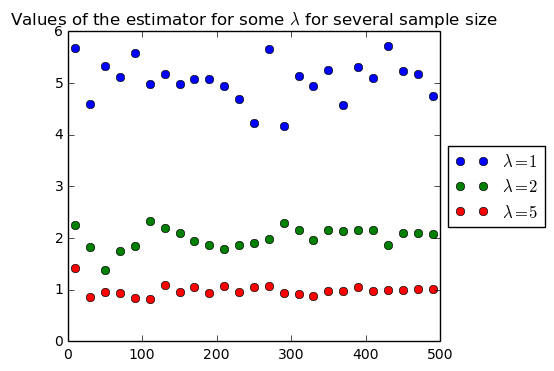

In [41]:
sample_size=np.arange(10,500,20)
Lambda_list=[1,2,5]
N=len(sample_size)
estimator = np.zeros((len(Lambda_list),N))
for i in range(N):
    estimator[0][i] = objFunc(observations(5,sample_size[i])).x

for i in range(N):
    estimator[1][i] = objFunc(observations(2,sample_size[i])).x


for i in range(N):
    estimator[2][i] = objFunc(observations(1,sample_size[i])).x

fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(sample_size,estimator[0],'o',label='$\lambda=1$')
ax.plot(sample_size,estimator[1],'o',label='$\lambda=2$')
ax.plot(sample_size,estimator[2],'o',label='$\lambda=5$')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Values of the estimator for some $\lambda$ for several sample size')
plt.show()

As we can observe, we have indeed convergence of our estimator toward the true value of $\lambda$. We can note that the performance increases with the size of the sample, and we could show that this estimator is unbiased.

We want now to observe the behavior of the MSE with respect to the true value of $\lambda$.

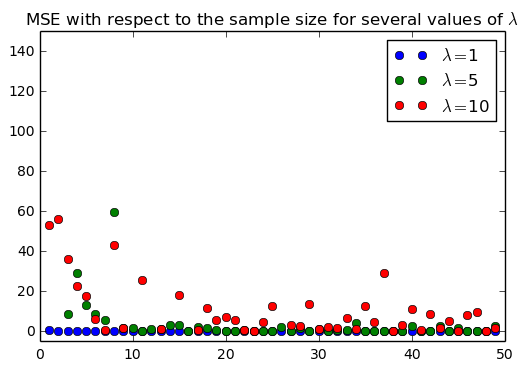

In [49]:
from sklearn.metrics import mean_squared_error

#sample_size=[10,50,100,200,300,500,1000]
sample_size=np.arange(1,50,1)
N=len(sample_size)
Lambda_list=[1,5,10]
y_true = [Lambda]
estimator = np.zeros((len(Lambda_list),N))
MSE_list=np.zeros((len(Lambda_list),N))


for j,Lambda in enumerate(Lambda_list):
 for i in range(N):
    estimator[j,i] = objFunc(observations(Lambda,sample_size[i])).x
    MSE_list[j,i]=mean_squared_error([Lambda], [estimator[j,i]])

 plt.plot(sample_size,MSE_list[j],'o',label='$\lambda=$'+str(Lambda))

plt.ylim((-5,150))
plt.legend()
plt.title('MSE with respect to the sample size for several values of $\lambda$')

As we could predict we observe a decreasing of the MSE with respect to the size sample. Indeed we have a consistant estimator so the MSE should decrease to have convergence of our estimator.

We can note that for high $\lambda$ it harder to find the right estiamtor. This comes from the fact that we are dealing with a truncated distribution, and not the full one. When we reach the truncation size, the estimator has difficulty to detect the true value.

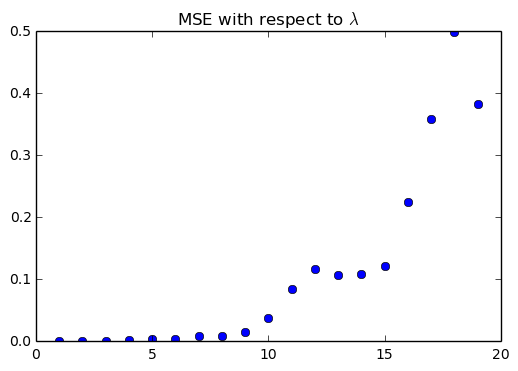

In [8]:
#sample_size=[10000]
from sklearn.metrics import mean_squared_error
sample_size=[10000]
N=1
Lambda_list = np.arange(1,20,1)
mean=10
estimator = np.zeros((len(Lambda_list),mean))
MSE_list=np.zeros(len(Lambda_list))


for j,Lambda in enumerate(Lambda_list):
 
    for k in range(mean):
     estimator[j,k] = objFunc(observations(Lambda,sample_size[0])).x
    MSE_list[j]=mean_squared_error([Lambda]*mean, estimator[j])

plt.plot(Lambda_list,MSE_list,'o')
plt.title('MSE with respect to $\lambda$')

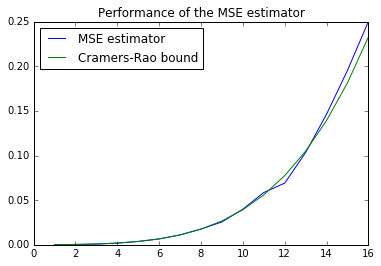

In [1]:
from IPython.display import Image
Image("mse_estime.png")

As we can observe for small $\lambda$ it follows the MSE, which is good because it shows that our estimator is consistant. However as we increase $\lambda$ the error increase even if we are optimal with respect ot the bound. 

This can be explain by the fact that we are trying to estimate the parameter of a truncated distribution. For such distribution it is important to notice that as we reach the truncated value, the ML estimator can be unefficient sometimes because we don't have enough values to distinguish the several $\lambda$ possible.

But far from the boundary, our estimator is really good.

We want now to study the MAP estimator. The idea behing this kind of estimator is to estimate $\lambda$ as the mode of the posterior distribution. If the prior is uniform, then the MAP estiamtor coincide with the ML estimator, as we can easily deduce with the Bayes formula.

The next curve is analog to the one for ML estimator. It seems logic because our prior is the Fisher information. Moreover this estimator is asymptotically unbiased, because the argmax is a function of Fisher information and Likehood. The Likehood is asymptotically unbiased and the Fisher information, for such big sample does not impact the biais because we are taking the expectation.

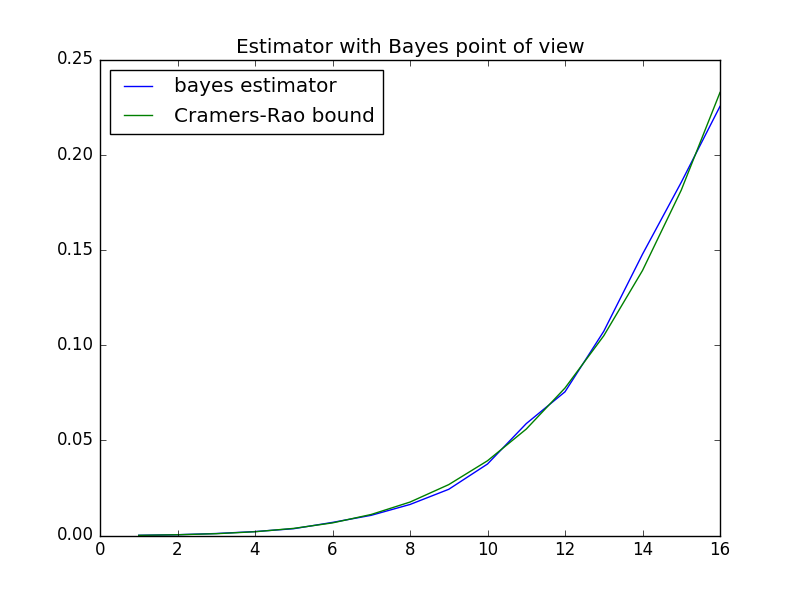

In [3]:
Image("est_bayes.png")

In [64]:
from sympy import * 


x=Symbol('x')
Lambda = Symbol('Lambda')

Z = Lambda*(exp(-1/Lambda)-exp(-20/Lambda))
DZ = diff(ln(Z),Lambda,2)
DZ

Z2=ln(exp(-x/Lambda))
DZ2 = diff(Z2,Lambda,2)
DZ2
Rep=DZ2.subs(x,(20*Lambda*exp(-20/Lambda)-Lambda*exp(-1/Lambda))/(Z)+(-20*Lambda*exp(-20/Lambda)+Lambda*exp(-1/Lambda))/(Z/Lambda))

simplify(-Rep+DZ)


(Lambda**2*exp(38/Lambda) - 40*Lambda**2*exp(19/Lambda) + 39*Lambda**2 - 4*Lambda*exp(38/Lambda) + 84*Lambda*exp(19/Lambda) - 80*Lambda - 361*exp(19/Lambda))/(Lambda**4*(exp(38/Lambda) - 2*exp(19/Lambda) + 1))

In [ ]:
A=diff(ln(Lambda*exp(x*Lambda)),Lambda,2)
B=diff(ln(exp(-x/Lambda)/(Lambda*(exp(-1/Lambda)-exp(-20/Lambda)))),Lambda,2)
#simplify(A)
Simp=simplify(-B)
Simp
Rep=Simp.subs(x,1/Lambda)
simplify(Rep)

## The MNIST Dataset

We will now use the MNIST Dataset to train a machine learning algortihm with neural net.

For now we will use the sigmoid fonction as the transfer function.



We want to find the best estimator to our problem. For this, we use the mean square error as measure of performance of our model and we introduce regularization. Thus the total error function will be :
$$ (Xw -y)^\top (Xw - y) + \frac12 \Gamma w^\top w$$
The optimal estimator will be given for : 
$$ \nabla_w (Xw -y)^\top (Xw - y) +  \Gamma w^\top w = 0$$
We expand and find :
$$  X^\top X w -  X^\top y + \Gamma w = 0$$
And finally :
$$ \hat w = (X^\top X + \Gamma I)^{-1} X^\top Y$$




As say at the end of part 2, the method with the matrix has the inconvenient of using a load of RAM when trying to invert it. In order to be able to obtain nice results we will  use a neural network architecture we will perform a stochastic gradient descent on an neural network with the following architecture. The architecture explain why $M$, or $n$ in this case, can be described as a number of hidden neurons. To have different behavior we will use several values of $M$ in the neural networks.
At the end, the learning is the same, but we didn't had to take the inverse of some big matrices, we will compute this method during this homework.

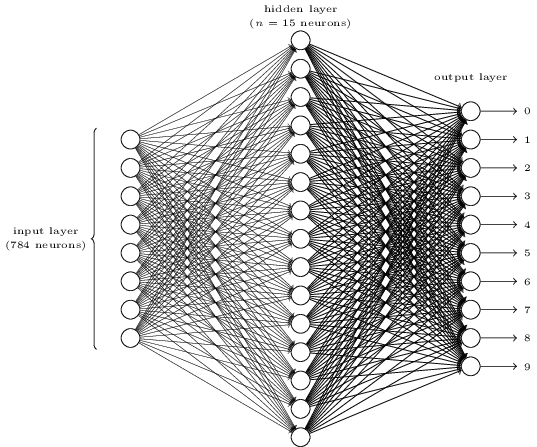

In [22]:
from IPython.display import Image
Image("tikz12.png")

In [21]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import cPickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [19]:

import sys

# My library

# Third-party libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x)
            ax.matshow(images[10*y+x], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

def get_images(training_set):
    """ Return a list containing the images from the MNIST data
    set. Each image is represented as a 2-d numpy array."""
    flattened_images = training_set[0]
    return [np.reshape(f, (-1, 28)) for f in flattened_images]


training_set, validation_set, test_set = load_data()
images = get_images(training_set)


The MNIST dataset is a set of number as on the next picture. Our goal is to learn to classify the number : from 0 to 9, with a neural network. At the beginning we will use the quadratic cost function and we will add some regularization to have networks which are performing better.

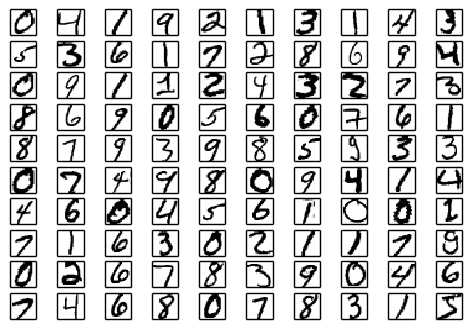

In [20]:
plot_10_by_10_images(images)

We will plot the accuracy of the classification for several number of hidden neurons, with some vlaues of the learning parameters. We will then compare the performance for the training data and the evaluation data.

In [23]:
import json
import random
import sys

# Third-party libraries
import numpy as np


#### Define the quadratic and cross-entropy cost functions

class QuadraticCost(object):

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ``a`` and desired output
        ``y``.

        """
        return 0.5*np.linalg.norm(a-y)**2

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer."""
        return (a-y) * sigmoid_prime(z)


#### Main Network class
class Network(object):

    def __init__(self, sizes, cost=QuadraticCost):
        """The list ``sizes`` contains the number of neurons in the respective
        layers of the network.  For example, if the list was [2, 3, 1]
        then it would be a three-layer network, with the first layer
        containing 2 neurons, the second layer 3 neurons, and the
        third layer 1 neuron.  The biases and weights for the network
        are initialized randomly        

        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.large_weight_initializer()
        self.cost=cost

    def large_weight_initializer(self):
        """Initialize the weights using a Gaussian distribution with mean 0
        and standard deviation 1.  Initialize the biases using a
        Gaussian distribution with mean 0 and standard deviation 1.



        """
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            lmbda = 0.0,
            evaluation_data=None,
            monitor_evaluation_cost=False,
            monitor_evaluation_accuracy=False,
            monitor_training_cost=False,
            monitor_training_accuracy=False):
        """Train the neural network using mini-batch stochastic gradient
        descent.  The ``training_data`` is a list of tuples ``(x, y)``
        representing the training inputs and the desired outputs.  The
        other non-optional parameters are self-explanatory, as is the
        regularization parameter ``lmbda``.  The method also accepts
        ``evaluation_data``, usually either the validation or test
        data.  We can monitor the cost and accuracy on either the
        evaluation data or the training data, by setting the
        appropriate flags.  The method returns a tuple containing four
        lists: the (per-epoch) costs on the evaluation data, the
        accuracies on the evaluation data, the costs on the training
        data, and the accuracies on the training data.  All values are
        evaluated at the end of each training epoch.  So, for example,
        if we train for 30 epochs, then the first element of the tuple
        will be a 30-element list containing the cost on the
        evaluation data at the end of each epoch. Note that the lists
        are empty if the corresponding flag is not set.

        """
        if evaluation_data: n_data = len(evaluation_data)
        n = len(training_data)
        evaluation_cost, evaluation_accuracy = [], []
        training_cost, training_accuracy = [], []
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(
                    mini_batch, eta, lmbda, len(training_data))
            print "Epoch %s training complete" % j
            if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print "Cost on training data: {}".format(cost)
            if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert=True)
                training_accuracy.append(accuracy)
                print "Accuracy on training data: {} / {}".format(
                    accuracy, n)
            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert=True)
                evaluation_cost.append(cost)
                print "Cost on evaluation data: {}".format(cost)
            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print "Accuracy on evaluation data: {} / {}".format(
                    self.accuracy(evaluation_data), n_data)
            print
        return evaluation_cost, evaluation_accuracy, \
            training_cost, training_accuracy

    def update_mini_batch(self, mini_batch, eta, lmbda, n):
        """Update the network's weights and biases by applying gradient
        descent using backpropagation to a single mini batch.  The
        ``mini_batch`` is a list of tuples ``(x, y)``, ``eta`` is the
        learning rate, ``lmbda`` is the regularization parameter, and
        ``n`` is the total size of the training data set.

        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], y)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
       
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def accuracy(self, data, convert=False):
        """Return the number of inputs in ``data`` for which the neural
        network outputs the correct result. The neural network's
        output is assumed to be the index of whichever neuron in the
        final layer has the highest activation.

        The flag ``convert`` should be set to False if the data set is
        validation or test data (the usual case), and to True if the
        data set is the training data. The need for this flag arises
        due to differences in the way the results ``y`` are
        represented in the different data sets.  In particular, it
        flags whether we need to convert between the different
        representations.
       
        """
        if convert:
            results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                       for (x, y) in data]
        else:
            results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in data]
        return sum(int(x == y) for (x, y) in results)

    def total_cost(self, data, lmbda, convert=False):
        """Return the total cost for the data set ``data``.  The flag
        ``convert`` should be set to False if the data set is the
        training data (the usual case), and to True if the data set is
        the validation or test data.  
        """
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert: y = vectorized_result(y)
            cost += self.cost.fn(a, y)/len(data)
        cost += 0.5*(lmbda/len(data))*sum(
            np.linalg.norm(w)**2 for w in self.weights)
        return cost

    def save(self, filename):
        """Save the neural network to the file ``filename``."""
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "cost": str(self.cost.__name__)}
        f = open(filename, "w")
        json.dump(data, f)
        f.close()

#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  
    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net

#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position
    and zeroes elsewhere.  This is used to convert a digit (0...9)
    into a corresponding desired output from the neural network.

    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [24]:
training_data, validation_data, test_data = load_data_wrapper() 

In [6]:

def plot_test_accuracy(test_accuracy, num_epochs, test_accuracy_xmin):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(test_accuracy_xmin, num_epochs), 
            [accuracy/100.0 
             for accuracy in test_accuracy[test_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([test_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the test data')
    plt.show()

    
def plot_training_accuracy(training_accuracy, num_epochs, 
                           training_accuracy_xmin, training_set_size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(np.arange(training_accuracy_xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy[training_accuracy_xmin:num_epochs]],
            color='#2A6EA6')
    ax.set_xlim([training_accuracy_xmin, num_epochs])
    ax.grid(True)
    ax.set_xlabel('Epoch')
    ax.set_title('Accuracy (%) on the training data')
    plt.show()



In [9]:
M_list=[10,30,50,100,200]
net_list=[]
data_list=[]

for i,M in enumerate(M_list):
    f = open('results_totaux'+str(M), "w")
    net = Network([784, M, 10])
    net.large_weight_initializer()
    test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data[:50000], 40, 10, 0.5,
                  evaluation_data=test_data, lmbda = 5.0,
                  monitor_evaluation_cost=True, 
                  monitor_evaluation_accuracy=True, 
                  monitor_training_cost=True, 
                  monitor_training_accuracy=True)
    data_list.append((test_cost, test_accuracy, training_cost, training_accuracy))
    net_list.append(net)
    net.save('nnM_'+str(M))
    json.dump([M,test_cost, test_accuracy, training_cost, training_accuracy], f)
f.close()





Epoch 0 training complete
Cost on training data: 0.458176078172
Accuracy on training data: 36812 / 50000
Cost on evaluation data: 1.44022357202
Accuracy on evaluation data: 7430 / 10000

Epoch 1 training complete
Cost on training data: 0.281221002679
Accuracy on training data: 43180 / 50000
Cost on evaluation data: 0.91991232953
Accuracy on evaluation data: 8743 / 10000

Epoch 2 training complete
Cost on training data: 0.204841836014
Accuracy on training data: 44604 / 50000
Cost on evaluation data: 0.634605375559
Accuracy on evaluation data: 8940 / 10000

Epoch 3 training complete
Cost on training data: 0.163318295699
Accuracy on training data: 45156 / 50000
Cost on evaluation data: 0.466455928416
Accuracy on evaluation data: 9059 / 10000

Epoch 4 training complete
Cost on training data: 0.140869242011
Accuracy on training data: 45360 / 50000
Cost on evaluation data: 0.369625647154
Accuracy on evaluation data: 9066 / 10000

Epoch 5 training complete
Cost on training data: 0.12631787612

In [2]:

def plot_overlay_train(data, num_epochs, xmin,
                 training_set_size,M_list):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i,M in enumerate(M_list):
     test_accuracy = data[i][1] 
     training_accuracy = data[i][3]
     ax.plot(np.arange(xmin, num_epochs), 
            [accuracy/100.0 for accuracy in test_accuracy], 
            
            label="Accuracy on the test data, M="+str(M))
     
     ax.grid(True)
     ax.set_xlim([xmin, num_epochs])
     ax.set_xlabel('Epoch')
     ax.set_ylim([90, 100])
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(loc="lower right")
    plt.show()

def plot_overlay_test(data, num_epochs, xmin,
                 training_set_size,M_list):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i,M in enumerate(M_list):
     test_accuracy = data[i][1] 
     training_accuracy = data[i][3]
     ax.plot(np.arange(xmin, num_epochs), 
            [accuracy*100.0/training_set_size 
             for accuracy in training_accuracy], 
            
            label="Accuracy on the training data, M="+str(M))
     ax.grid(True)
     ax.set_xlim([xmin, num_epochs])
     ax.set_xlabel('Epoch')
     ax.set_ylim([90, 100])
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(loc="lower right")
    plt.show()


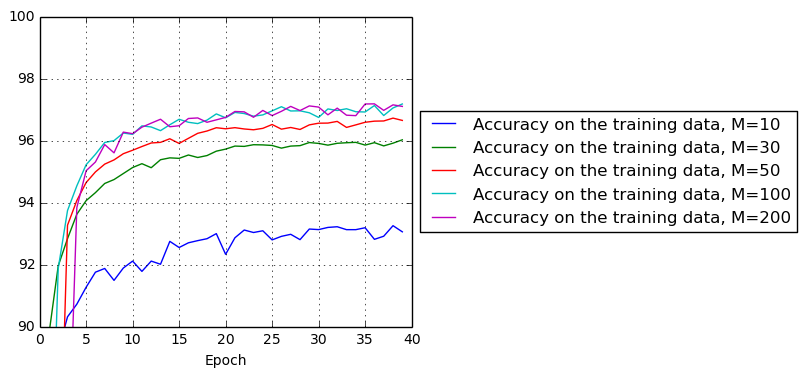

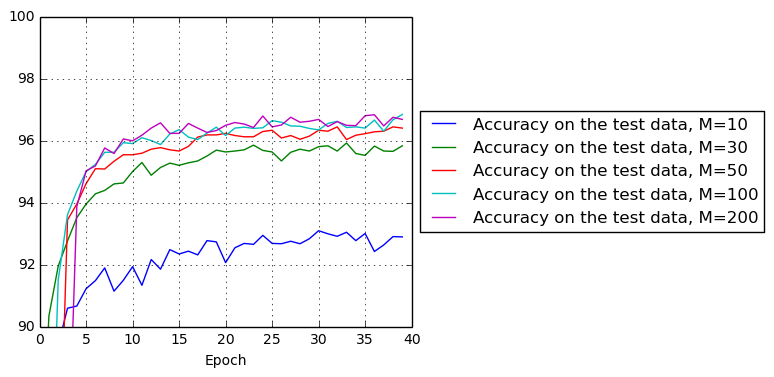

In [15]:
import json
M_list=[10,30,50,100,200]
net_list=[]
data_list=[]

for i,M in enumerate(M_list):
    with open('results_totaux'+str(M)) as json_data:
        d = json.loads(json_data.read())
        data_list.append(d[1:])
        
#%print data_list
plot_overlay_test(data_list, 40, 0,50000,M_list) 

plot_overlay_train(data_list, 40, 0,50000,M_list)    



#### What can we deduce from this results ? 




As we can see, increasing the number of hidden neurons $M$ lead to a larger accuracy of the system. On the first plot we notice that increasing $M$ first leads to an increase of learning on the training datas, but after $M=100$ the accuracy seems to be similar between the networks. 

On the test data, globally we observe the same behavior but the results are similar as soon as we reach $M=50$. We can obtain better accuracy by increasing the size of the hidden layer, but at some point that's the way to go to 100 % accuracy.

### Improvment on the results with Deep Learning 






We are going to improve with the network we have presented. To improve more the results we should use the convolutional network architecture, in order to recognize features but this is behond tis homework.

One way to improve the categorisation of digits without changing the architecture of the neural network is to work with another cost function. We will try to see what happend with the cost Entropy function. this one is defined by :
$$ C = - \frac{1}{n} \sum_x [y \ln y + (1-y) \ln (1-y)]$$
The cross entropy comes from the field of information theory, and is sometimes called the binary entropy. Just to introduce briefly this quantity, we can say that this quantity measure how much we are "surprised" when learning the true value of $y$. This quantity is equal to the Kullback_Leibner divergence up to some constant, which is appropriate to the course while highlighting the link between statistical physics and machine learning. 



Now we just have to add a class for this cost function and we can use the same program to see the difference with the quadratic cost function.

In [15]:
class CrossEntropyCost(object):

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ``a`` and desired output
        ``y``.  Note that np.nan_to_num is used to ensure numerical
        stability.  In particular, if both ``a`` and ``y`` have a 1.0
        in the same slot, then the expression (1-y)*np.log(1-a)
        returns nan.  The np.nan_to_num ensures that that is converted
        to the correct value (0.0).

        """
        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer.  Note that the
        parameter ``z`` is not used by the method.  It is included in
        the method's parameters in order to make the interface
        consistent with the delta method for other cost classes.

        """
        return (a-y)



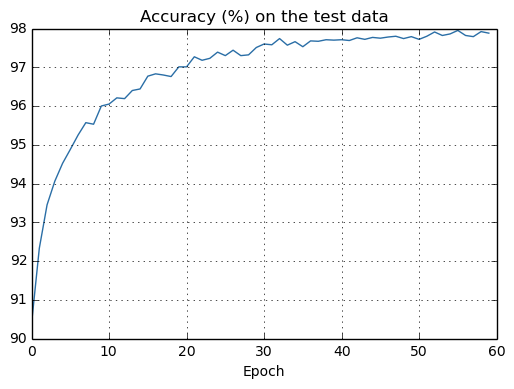

In [27]:

net = Network([784, 100, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy=net.SGD(training_data, 60, 10, 0.1, lmbda=5.0,evaluation_data=validation_data,monitor_evaluation_accuracy=True)


plot_test_accuracy(test_accuracy,60, 0)

As we can see we have better results. Indeed we are able to reach an accuracy of $98$ %. We highlight the fact that for machine learning problem, the choice of the cost function is important. 


If we work on the other parameter : architecture, transfer function, weight initialization .... we could still improve the classification. We are going briefly to introduce the results we can obtained with convolutional nets. For this we will use a python implementation : theano.

For optimization we will still use backpropagation and stochastic gradient descent as in the previous part. The algorithm is pretty huge and not really interessant because of the use of a package, thus it remains in another file.



In [16]:
import network_homework_5
from network_homework_5 import Network
from network_homework_5 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

training_data, validation_data, test_data = network_homework_5.load_data_shared()
mini_batch_size = 10
net = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2)),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2)),
        FullyConnectedLayer(n_in=40*4*4, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
validation =net.SGD(training_data, 40, mini_batch_size, 0.1, validation_data, test_data)  

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 93.00%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.25%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 96.94%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.59%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 97.55%
This is the best validation accuracy to date.
The corresponding test accuracy is 97.31%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

[0.92999999999999439, 0.96939999999999649, 0.97549999999999704, 0.97889999999999733, 0.98069999999999746, 0.98299999999999765, 0.98409999999999764, 0.98549999999999782, 0.98599999999999799, 0.98659999999999792, 0.98719999999999797, 0.98749999999999805, 0.987899999999998, 0.98829999999999818, 0.98859999999999826, 0.98859999999999804, 0.98839999999999806, 0.98869999999999814, 0.98879999999999812, 0.98879999999999812, 0.98889999999999811, 0.98879999999999824, 0.98889999999999822, 0.98889999999999811, 0.98899999999999821, 0.98939999999999828, 0.98929999999999829, 0.98919999999999819, 0.98919999999999819, 0.98929999999999829, 0.98919999999999819, 0.98919999999999819, 0.98919999999999819, 0.98929999999999829, 0.98919999999999819, 0.98919999999999819, 0.9892999999999984, 0.9892999999999984, 0.9891999999999983, 0.9891999999999983]


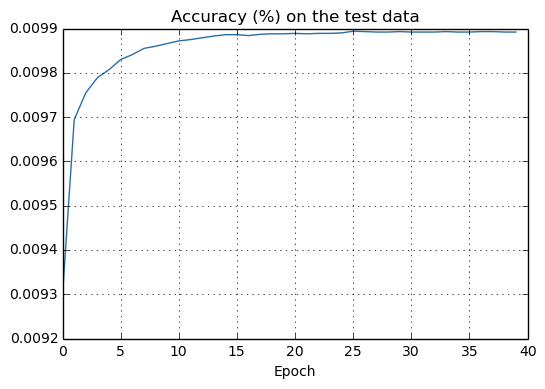

In [18]:
print validation
plot_test_accuracy(validation*100,40, 0)

As we can see we have improved our results with fully connected Networks. The architecture we were using is the one developped in 1998, known as LeNet-5. This accuracy is already amazing, but we can still improve it with a last trick.

We could modify the transfer function of the neurons, or modify the architecture. But we are going to highlight the importance of the training data. Indeed we are going to expand our dataset b displacing each training image up, down, left and right by only one pixel. We are going to see that it improves our accuracy by using the fact that the convolutional net will be recognize feature easily because it recognizes pattern.

Here is the result of this transformation :


In [28]:
import network_homework_5
from network_homework_5 import Network
from network_homework_5 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

mini_batch_size=10
training_data, validation_data, test_data = network_homework_5.load_data_shared()
expanded_training_data, _, _ = network_homework_5.load_data_shared(
        "../data/mnist_expanded.pkl.gz")

In [29]:
from network_homework_5 import ReLU
reseau = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
reseau.SGD(expanded_training_data, 60, mini_batch_size, 0.03, 
            validation_data, test_data, lmbda=0.1)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '15464' (I am process '4860')


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-batch number 19000
Training mini-batch number 20000
Training mini-batch number 21000
Training mini-batch number 22000
Training mini-batch number 23000
Training mini-batch number 24000
Epoch 0: validation accuracy 99.06%
This is the best validation accuracy to date.
The corresponding test accuracy is 99.04%
Training mini-batch number 25000
Training mini-batch number 2600

[0.99059999999999859,
 0.98979999999999835,
 0.99229999999999874,
 0.99119999999999853,
 0.99239999999999873,
 0.99199999999999866,
 0.99259999999999882,
 0.99249999999999883,
 0.99229999999999885,
 0.99239999999999884,
 0.99189999999999889,
 0.99229999999999885,
 0.99259999999999882,
 0.9916999999999988,
 0.99259999999999893,
 0.99289999999999901,
 0.99379999999999902,
 0.99249999999999883,
 0.99289999999999901,
 0.99219999999999864,
 0.99209999999999876,
 0.99269999999999903,
 0.99289999999999889,
 0.99209999999999865,
 0.99329999999999896,
 0.99179999999999868,
 0.99279999999999891,
 0.99359999999999904,
 0.99229999999999885,
 0.99219999999999864,
 0.99259999999999893,
 0.99309999999999887,
 0.99379999999999891,
 0.993999999999999,
 0.99409999999999898,
 0.99389999999999901,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99379999999999902,
 0.99389999999999912,
 0.9938999999

Hence we obtained 99,3 percent of accuracy. A small change in the expansion of the training data thus leads to a substantial improvement of the accuracy of out network. 

In this part we have highlight the several way to improve accuracy on neural network : configuration of the network, datas ...

#### To finish this homework we can insist on the fact that the datas are essential to a good accuracy of learning with the following fact, and we can note that our result is not that far away of this one :

In 2003 Simard, Steinkraus and Platt improved their MNIST performance to 99.6 percent using a neural network otherwise very similar to ours, using two convolutional-pooling layers, followed by a hidden fully-connected layer with 100 neurons. There were a few differences of detail in their architecture - they didn't have the advantage of using rectified linear units, for instance - but the key to their improved performance was expanding the training data. They did this by rotating, translating, and skewing the MNIST training images. They also developed a process of "elastic distortion", a way of emulating the random oscillations hand muscles undergo when a person is writing. By combining all these processes they substantially increased the effective size of their training data, and that's how they achieved 99.6 percent accuracy.